In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/Desktop/happyandsad/horse-or-human.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/Desktop/happyandsad/happy-or-sad")
local_zip = f"{getcwd()}/Desktop/happyandsad/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Desktop/happyandsad/validation-horse-or-human')
zip_ref.close()

C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}) :
            if(logs.get('acc')>0.99):
                self.model.stop_training=True
            
         

callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        #tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
        

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
train_generator = train_datagen.flow_from_directory(
        '/Desktop/happyandsad/happy-or-sad',
        target_size = (150,150),
        batch_size = 128,
        class_mode = 'binary'
    )
validation_generator = validation_datagen.flow_from_directory(
        '/Desktop/happyandsad/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    # Expected output: 'Found 80 images belonging to 2 classes'
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
model.fit_generator(
        train_generator,
        steps_per_epoch=8,
        epochs=15,
    callbacks = [callbacks],
    validation_data=validation_generator,
    validation_steps=8
        )
          # Your Code Here)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 23s 3s/step - loss: 1.0249 - acc: 0.4839 - val_loss: 0.5905 - val_acc: 0.6602
Epoch 2/15
8/8 [==============================] - 16s 2s/step - loss: 0.5438 - acc: 0.6507 - val_loss: 0.5704 - val_acc: 0.6992
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.3094 - acc: 0.9077 - val_loss: 0.7413 - val_acc: 0.8477
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.2524 - acc: 0.8926 - val_loss: 2.6998 - val_acc: 0.6445
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 0.1531 - acc: 0.9266 - val_loss: 2.3385 - val_acc: 0.6719
Epoch 6/15
8/8 [==============================] - 15s 2s/step - l

[1.]
 is a human


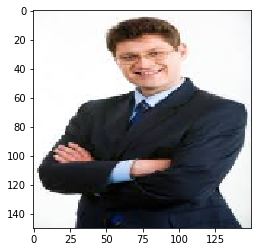

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image 
  # predicting images
path = f"{getcwd()}/Desktop/download.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
import matplotlib
from matplotlib import pyplot as plt
plt.imshow(img)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print( " is a human")
else:
    print( " is a horse")